In [ ]:
pip install topologicpy --upgrade

In [85]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [87]:
pip install matplotlib

  Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 3.9 MB/s eta 0:00:0000:0100:010m
Using cached contourpy-1.2.1-cp312-cp312-macosx_11_0_arm64.whl (245 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.9 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.5-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.0 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pydot

In [154]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [155]:
import topologicpy
import json
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
from topologicpy.Topology import Topology
from topologicpy.Cell import Cell
from topologicpy.Graph import Graph
from topologicpy.Vertex import Vertex
from topologicpy.Edge import Edge
from topologicpy.Dictionary import Dictionary

In [76]:
# Import the graph json
with open("graph.json") as json_data:
    graph_json = json.load(json_data)

In [176]:
# Export Vertices with dictionaries
vertices = graph_json["vertices"]
df_vertices= pd.DataFrame(vertices)

verticesKeys= list(vertices.keys())

# Create topologic_core.Vertex
graph_vertices=[]

for v in verticesKeys:
    X = vertices[v]["x"]
    Y = vertices[v]["y"]
    Z = vertices[v]["z"]
    
    vertex = Vertex.ByCoordinates(x = X, y = Y, z = Z)
    
    dictionary = Dictionary.ByKeysValues(keys = ["id","location","orientation","profile_dim"], values = list(df_vertices[v][["id","location","orientation","profile_dim"]]))
    dict_vertex = Topology.SetDictionary(vertex, dictionary)
    
    graph_vertices.append(dict_vertex)
    vertices[v]["topologic_Vertex"] = dict_vertex

# Export Edges with dictionaries
edges = graph_json["edges"]
# print(edges)
edgesKeys = list(edges.keys())

# Create topologic_core.Edge
graph_edges = []

for e in edgesKeys:
    start = vertices[edges[e]["source"]]["topologic_Vertex"]
    end = vertices[edges[e]["target"]]["topologic_Vertex"]
    
    edge = Edge.ByVertices([start,end])
    
    graph_edges.append(edge)
    edges[e]["topologic_Edge"] = edge



In [163]:
v = Topology.Dictionary(vertices["Vertex_0001"]["topologic_Vertex"])
Dictionary.ValueAtKey(v,"orientation")

'horizontal'

In [167]:
topoGraph = Graph.ByVerticesEdges(graph_vertices, graph_edges)
print(topoGraph)

vertexColor=[]
for c in vertices:
    if vertices[c]["z"] != 2.625:
        vertexColor.append("red")
    else:
        vertexColor.append("white")

Graph.Show(topoGraph,
           vertexColor = vertexColor,
           edgeColor = "white",
           projection = "orthographic")

In [192]:
# Check Dictionaries in graphs vertices
Gv = Graph.Vertices(topoGraph)
index = 23

extract_Graph_node = [Topology.Dictionary(Gv[i]) for i,v in enumerate(Gv)]

[Dictionary.ValueAtKey(d ,"orientation") for d in extract_Graph_node]

['horizontal',
 'vertical',
 'horizontal',
 'horizontal',
 'vertical',
 'horizontal',
 'vertical',
 'horizontal',
 'horizontal',
 'vertical',
 'horizontal',
 'horizontal',
 'vertical',
 'vertical',
 'horizontal',
 'vertical',
 'horizontal',
 'vertical',
 'horizontal',
 'vertical',
 'horizontal',
 'horizontal',
 'horizontal',
 'horizontal',
 'vertical',
 'horizontal',
 'vertical',
 'vertical',
 'horizontal',
 'horizontal',
 'vertical',
 'horizontal',
 'horizontal',
 'horizontal',
 'horizontal',
 'vertical',
 'vertical',
 'vertical',
 'horizontal',
 'vertical',
 'vertical',
 'horizontal',
 'vertical',
 'horizontal',
 'horizontal',
 'horizontal',
 'horizontal',
 'horizontal',
 'vertical']

In [122]:
flatten_G = Graph.Flatten(topoGraph, layout = "spring", iterations=50)

Graph.Show(flatten_G)

Number of Nodes: 49


In [94]:
import pydot

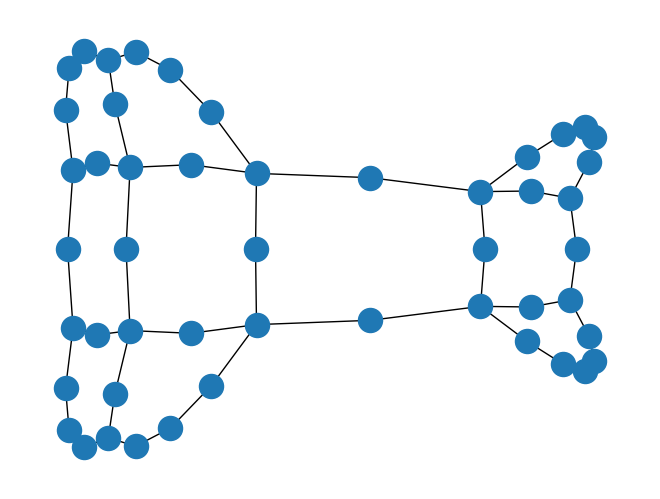

In [132]:
G = Graph.NetworkXGraph(topoGraph)


G.nodes(data = True)

pos = nx.spectral_layout(G)
nx.draw(G,pos)